In [88]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import json

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [89]:
feture_folder = '/home/ubuntu/meme_data/VB/'
with open(feture_folder + 'train.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_train = np.concatenate((X2, X3, X4, X5, X6), axis = 1)
    label_train = np.asarray(temp['label'])

with open(feture_folder + 'dev.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_dev = np.concatenate((X2, X3, X4, X5, X6), axis = 1)
    Id_dev = np.asarray(temp['id'])
    label_dev = np.asarray(temp['label'])

num_classes = len(np.unique(label_train))

In [90]:
X_t1 = np.copy(X_train)
X_t1[:, :768] = 0
label_t1 = np.copy(label_train)

X_t2 = np.copy(X_train)
X_t2[:, 768:] = 0
label_t2 = np.copy(label_train)

X_train = np.concatenate((X_train, X_t1, X_t2), axis = 0)
label_train = np.concatenate((label_train, label_t1, label_t2), axis = 0)

index = np.arange(X_train.shape[0])
np.random.shuffle(index)
X_train = X_train[index, :]
label_train = label_train[index]

In [91]:
N_feature = X_train.shape[1]

model = Sequential([
    layers.Dropout(0.3, input_shape = (N_feature, )),
    layers.Dense(128, activation= 'sigmoid'),
    layers.Dropout(0.3),
#     layers.Dense(8, activation= 'tanh'),
    layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_52 (Dropout)         (None, 3333)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               426752    
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 129       
Total params: 426,881
Trainable params: 426,881
Non-trainable params: 0
_________________________________________________________________


In [97]:
wei = np.where(label_train==1, len(label_train[label_train==0])/len(label_train[label_train==1]) , 1)


epochs = 200
history = model.fit(X_train, label_train,
                    validation_data = (X_dev, label_dev),
                    epochs=epochs, 
                    batch_size = 256, 
                    sample_weight = wei
)

Train on 25500 samples, validate on 500 samples
Epoch 1/200
25500/25500 [==============================] - 2s 66us/sample - loss: 0.5978 - acc: 0.7653 - auc_10: 0.8563 - val_loss: 0.7176 - val_acc: 0.6520 - val_auc_10: 0.7005
Epoch 2/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.6020 - acc: 0.7642 - auc_10: 0.8543 - val_loss: 0.7164 - val_acc: 0.6560 - val_auc_10: 0.6991
Epoch 3/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5902 - acc: 0.7702 - auc_10: 0.8605 - val_loss: 0.7077 - val_acc: 0.6380 - val_auc_10: 0.6976
Epoch 4/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.5980 - acc: 0.7675 - auc_10: 0.8570 - val_loss: 0.7116 - val_acc: 0.6460 - val_auc_10: 0.7001
Epoch 5/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.5946 - acc: 0.7658 - auc_10: 0.8585 - val_loss: 0.7383 - val_acc: 0.6380 - val_auc_10: 0.6986
Epoch 6/200
25500/25500 [==============================] - 1s 

25500/25500 [==============================] - 1s 29us/sample - loss: 0.5541 - acc: 0.7860 - auc_10: 0.8784 - val_loss: 0.7692 - val_acc: 0.6500 - val_auc_10: 0.7069
Epoch 47/200
25500/25500 [==============================] - 1s 27us/sample - loss: 0.5506 - acc: 0.7858 - auc_10: 0.8801 - val_loss: 0.7651 - val_acc: 0.6420 - val_auc_10: 0.7070
Epoch 48/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.5483 - acc: 0.7885 - auc_10: 0.8808 - val_loss: 0.7768 - val_acc: 0.6440 - val_auc_10: 0.7075
Epoch 49/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5510 - acc: 0.7891 - auc_10: 0.8803 - val_loss: 0.7557 - val_acc: 0.6480 - val_auc_10: 0.7087
Epoch 50/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.5526 - acc: 0.7871 - auc_10: 0.8793 - val_loss: 0.7511 - val_acc: 0.6520 - val_auc_10: 0.7069
Epoch 51/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5490 - acc: 0.7894 - auc_10: 0.88

Epoch 92/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5023 - acc: 0.8133 - auc_10: 0.9023 - val_loss: 0.8364 - val_acc: 0.6400 - val_auc_10: 0.7098
Epoch 93/200
25500/25500 [==============================] - 1s 27us/sample - loss: 0.5081 - acc: 0.8090 - auc_10: 0.8998 - val_loss: 0.7963 - val_acc: 0.6360 - val_auc_10: 0.7080
Epoch 94/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5048 - acc: 0.8058 - auc_10: 0.9005 - val_loss: 0.8031 - val_acc: 0.6380 - val_auc_10: 0.7098
Epoch 95/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.4992 - acc: 0.8100 - auc_10: 0.9034 - val_loss: 0.8094 - val_acc: 0.6340 - val_auc_10: 0.7093
Epoch 96/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.5017 - acc: 0.8090 - auc_10: 0.9023 - val_loss: 0.7947 - val_acc: 0.6340 - val_auc_10: 0.7101
Epoch 97/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.5029 - acc: 0.8100 -

25500/25500 [==============================] - 1s 29us/sample - loss: 0.4650 - acc: 0.8259 - auc_10: 0.9166 - val_loss: 0.9054 - val_acc: 0.6300 - val_auc_10: 0.7048
Epoch 138/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.4646 - acc: 0.8264 - auc_10: 0.9171 - val_loss: 0.8994 - val_acc: 0.6320 - val_auc_10: 0.7039
Epoch 139/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.4523 - acc: 0.8315 - auc_10: 0.9219 - val_loss: 0.9051 - val_acc: 0.6320 - val_auc_10: 0.7070
Epoch 140/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.4612 - acc: 0.8255 - auc_10: 0.9177 - val_loss: 0.9097 - val_acc: 0.6220 - val_auc_10: 0.7049
Epoch 141/200
25500/25500 [==============================] - 1s 27us/sample - loss: 0.4589 - acc: 0.8296 - auc_10: 0.9194 - val_loss: 0.9234 - val_acc: 0.6260 - val_auc_10: 0.7074
Epoch 142/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.4569 - acc: 0.8310 - auc_10:

25500/25500 [==============================] - 1s 27us/sample - loss: 0.4269 - acc: 0.8406 - auc_10: 0.9304 - val_loss: 0.9702 - val_acc: 0.6300 - val_auc_10: 0.7049
Epoch 183/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.4292 - acc: 0.8400 - auc_10: 0.9298 - val_loss: 0.9706 - val_acc: 0.6200 - val_auc_10: 0.7039
Epoch 184/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.4257 - acc: 0.8429 - auc_10: 0.9308 - val_loss: 0.9697 - val_acc: 0.6220 - val_auc_10: 0.7048
Epoch 185/200
25500/25500 [==============================] - 1s 27us/sample - loss: 0.4183 - acc: 0.8452 - auc_10: 0.9332 - val_loss: 0.9681 - val_acc: 0.6300 - val_auc_10: 0.7047
Epoch 186/200
25500/25500 [==============================] - 1s 29us/sample - loss: 0.4217 - acc: 0.8458 - auc_10: 0.9324 - val_loss: 0.9670 - val_acc: 0.6300 - val_auc_10: 0.7061
Epoch 187/200
25500/25500 [==============================] - 1s 28us/sample - loss: 0.4175 - acc: 0.8469 - auc_10:

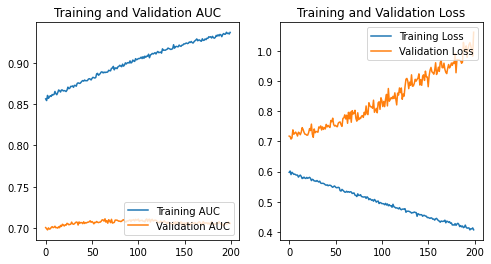

In [98]:
acc = history.history[list(history.history.keys())[2]]
val_acc = history.history[list(history.history.keys())[-1]]

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation AUC ROC with image: 0.7064159999999998


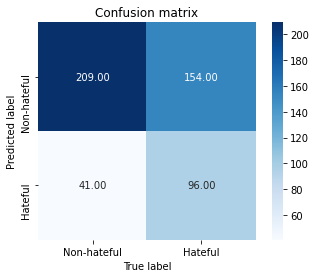

In [99]:
prob = model.predict(X_dev)
print('Validation AUC ROC with image:', roc_auc_score(label_dev, prob, multi_class='ovo'))

confusion = confusion_matrix(
label_dev, np.round(prob, 0))

axis_labels = ['Non-hateful', 'Hateful']
ax = sns.heatmap(
    confusion.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.title("Confusion matrix")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

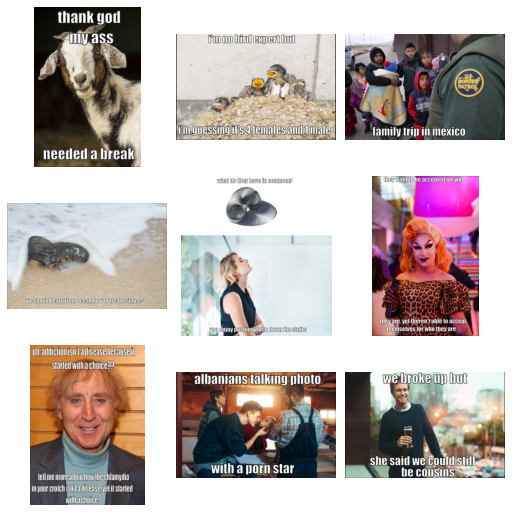

In [100]:
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 1][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')

False Positive


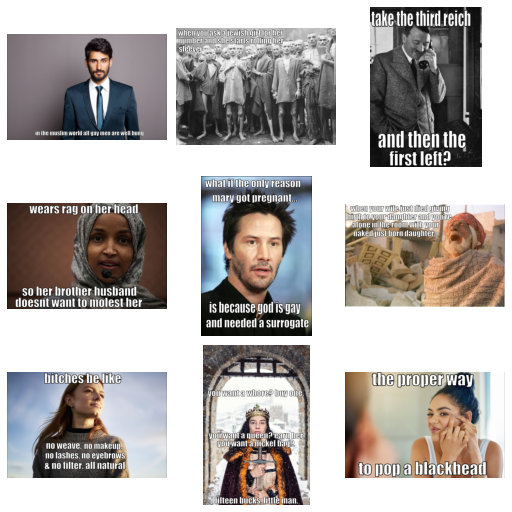

In [101]:
print("False Positive")
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 0][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')